Survival Statistics:
           Fare                                                         \
          count       mean        std   min      25%      50%      75%   
Survived                                                                 
0         265.0  27.527877  41.079423  0.00  7.85420  13.0000  26.5500   
1         152.0  49.747699  73.108716  6.95  8.62605  21.5125  55.4417   

                    
               max  
Survived            
0         262.3750  
1         512.3292  

Dataset Overview:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, M

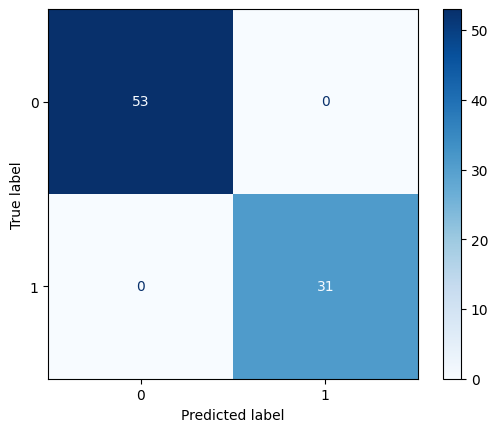

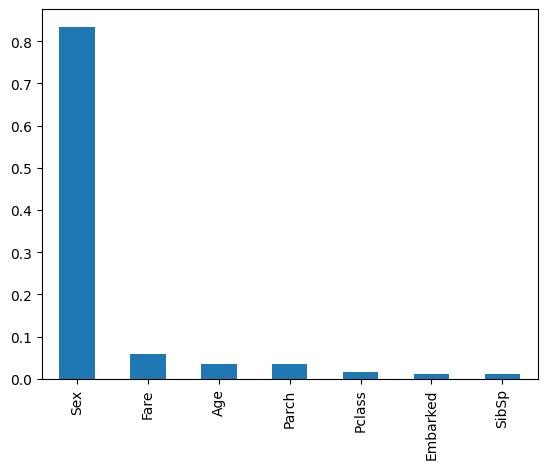

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("titanic.csv")

data = data.copy()

print("Survival Statistics:")
print(data[['Survived', 'Fare']].groupby('Survived').describe())
print("\nDataset Overview:")
print(data.head())


data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)


label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


model = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_split=5, min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)


cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f}")


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()
